<a href="https://colab.research.google.com/github/CallMeAaryan/RealEstatePricePrediction/blob/main/Real_Estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
path = "/content/drive/MyDrive/Real Estate/Boston.csv"
housing = pd.read_csv(path)
housing.head()


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
housing.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

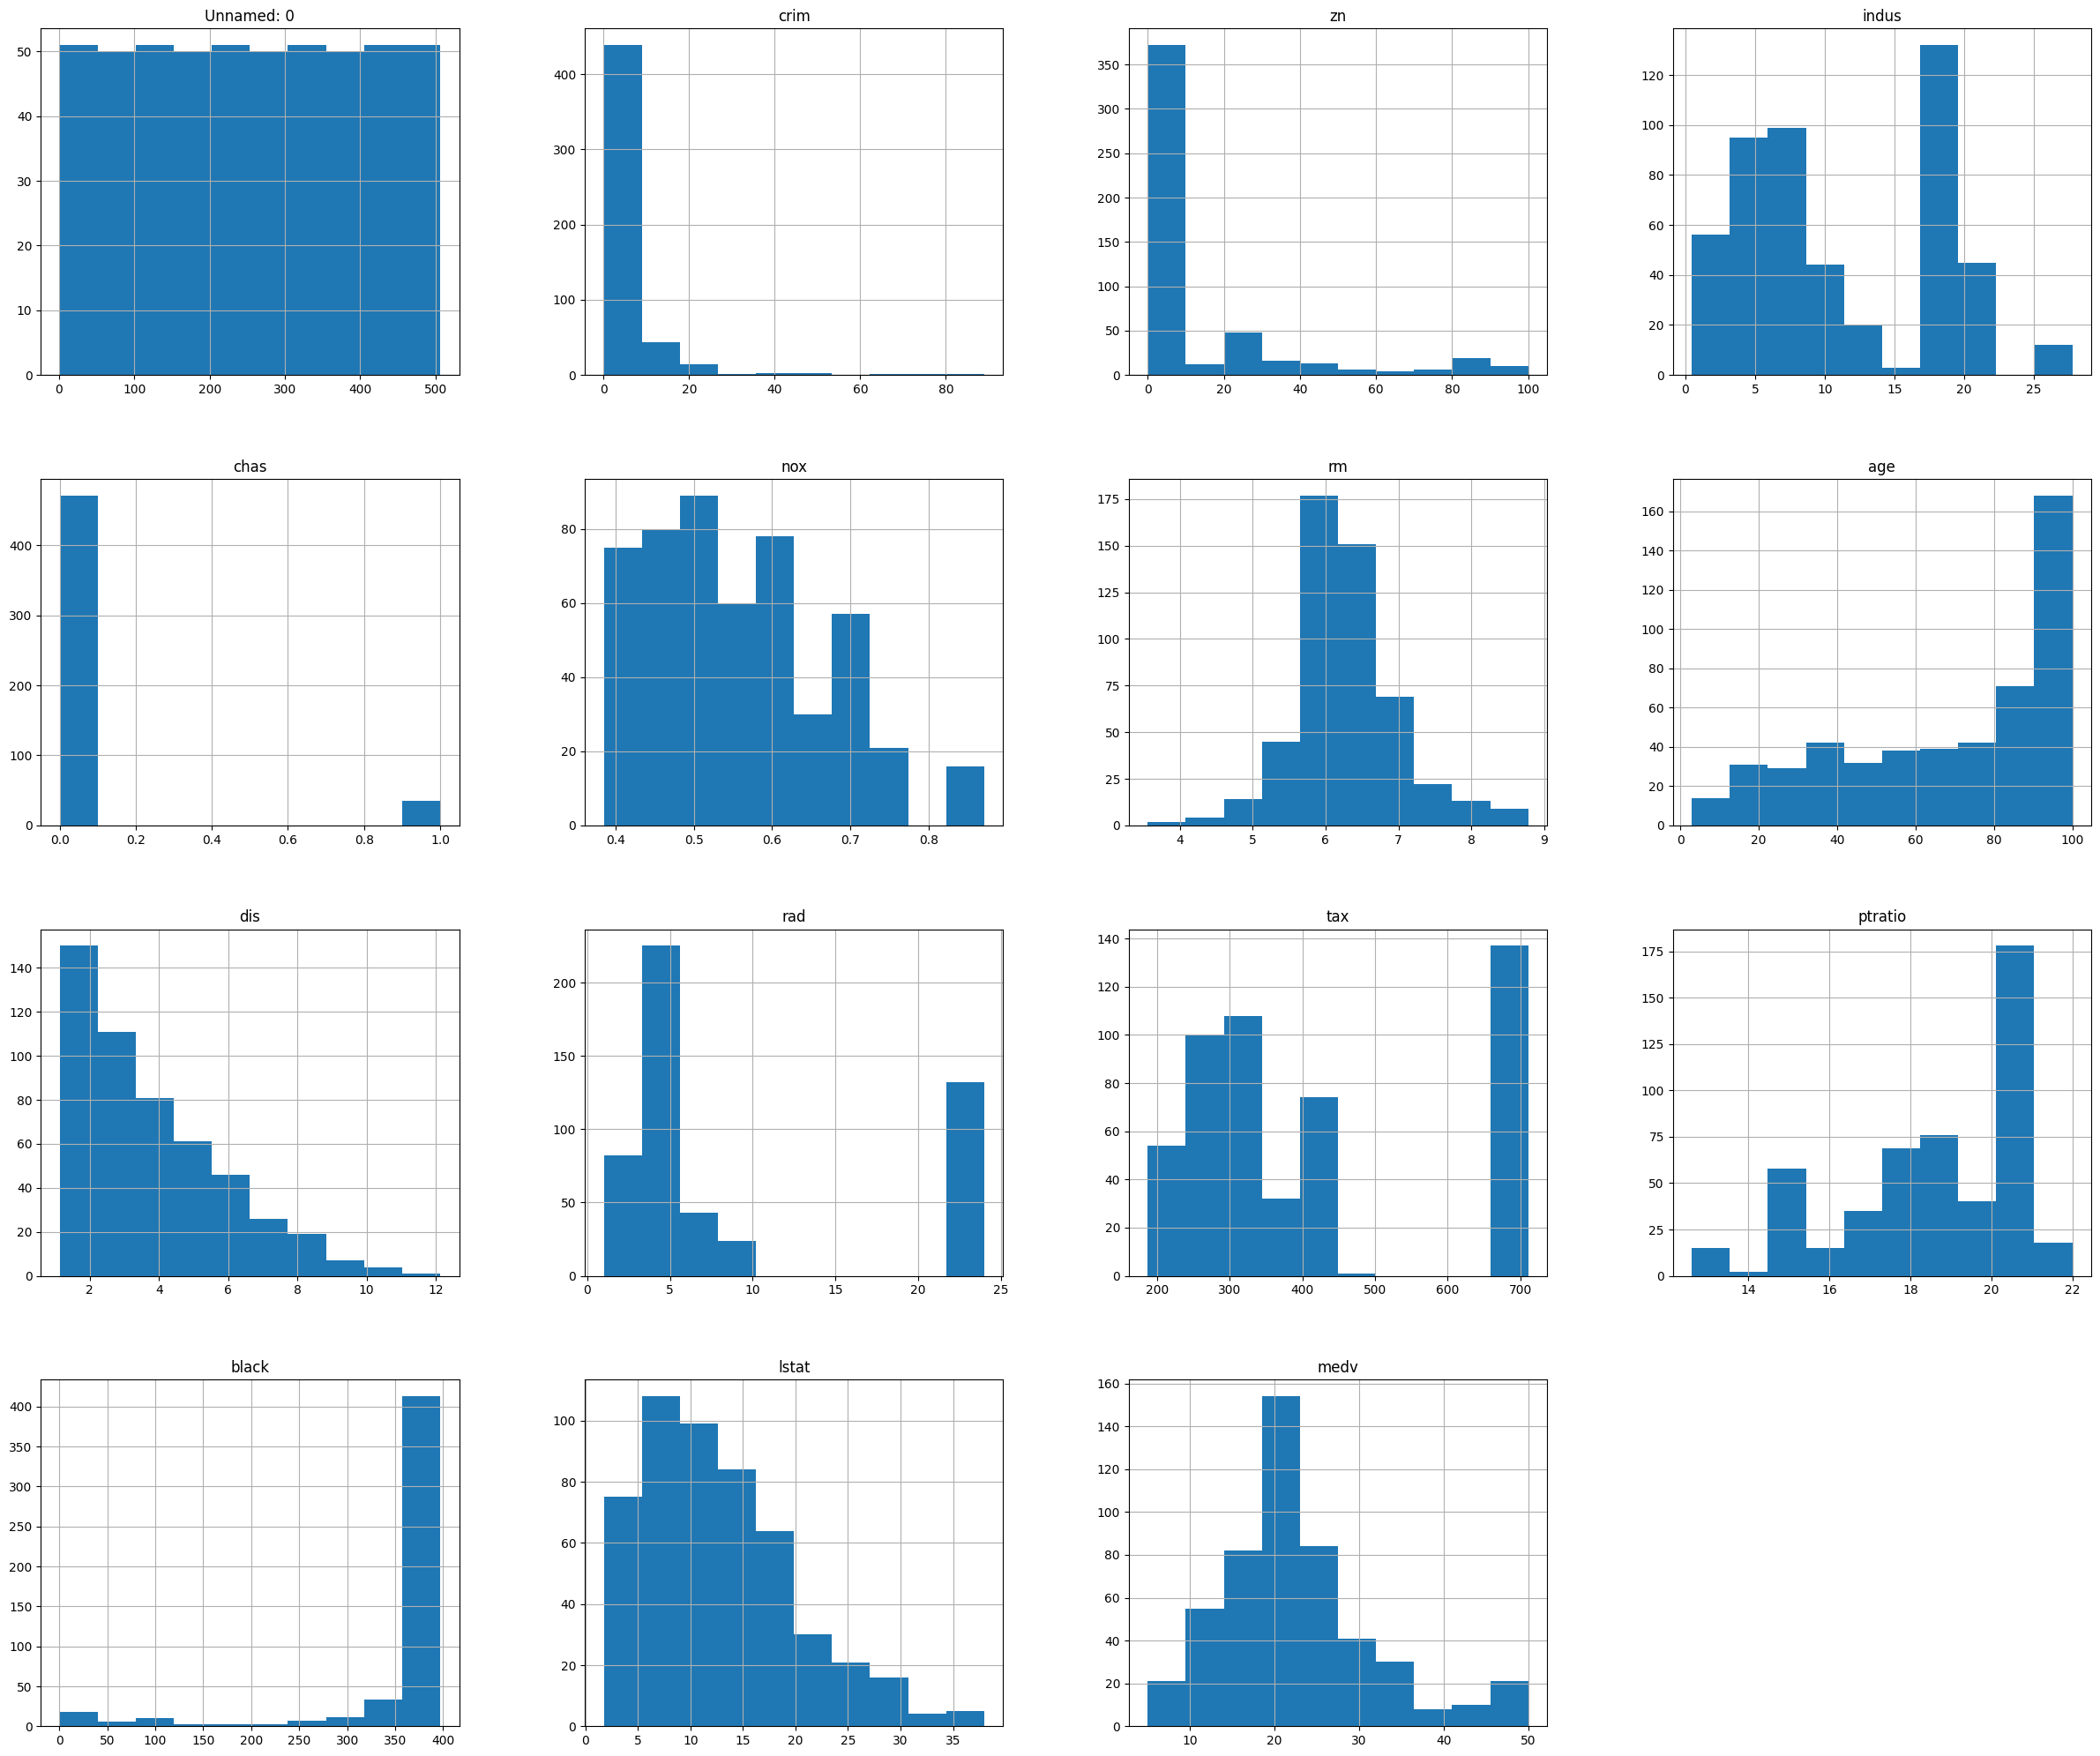

In [ ]:
housing.hist(figsize = (30,25))
plt.show()

In [ ]:
def test_split(data , test_ratio):
  rand_data = np.random.permutation(len(data))
  test_size = int(len(data)*test_ratio)
  test_indices = rand_data[:test_size]
  train_indices = rand_data[test_size:]
  return data.iloc[train_indices] , data.iloc[test_indices]

#from sklearn.model_selection import train_test_split
#train_set , test_set = train_test_split(housing , test_size = 0.25 , random_state = 1)



In [ ]:
train_set , test_set = test_split(housing , 0.25)

In [ ]:
print(len(train_set))
print(len(test_set))

380
126


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits =  1 ,test_size = 0.25 , random_state = 1)
for train_index , test_index in split.split(housing , housing['chas']):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]


In [ ]:
strat_test_set['chas'].value_counts()

0    118
1      9
Name: chas, dtype: int64

In [ ]:
strat_train_set['chas'].value_counts()

0    353
1     26
Name: chas, dtype: int64

In [ ]:
118/127

0.9291338582677166

In [ ]:
353/379

0.9313984168865436

In [ ]:
corr_matrix = housing.corr()
corr_matrix['medv']

Unnamed: 0   -0.226604
crim         -0.388305
zn            0.360445
indus        -0.483725
chas          0.175260
nox          -0.427321
rm            0.695360
age          -0.376955
dis           0.249929
rad          -0.381626
tax          -0.468536
ptratio      -0.507787
black         0.333461
lstat        -0.737663
medv          1.000000
Name: medv, dtype: float64

array([[<Axes: xlabel='medv', ylabel='medv'>,
        <Axes: xlabel='zn', ylabel='medv'>,
        <Axes: xlabel='rm', ylabel='medv'>,
        <Axes: xlabel='lstat', ylabel='medv'>],
       [<Axes: xlabel='medv', ylabel='zn'>,
        <Axes: xlabel='zn', ylabel='zn'>,
        <Axes: xlabel='rm', ylabel='zn'>,
        <Axes: xlabel='lstat', ylabel='zn'>],
       [<Axes: xlabel='medv', ylabel='rm'>,
        <Axes: xlabel='zn', ylabel='rm'>,
        <Axes: xlabel='rm', ylabel='rm'>,
        <Axes: xlabel='lstat', ylabel='rm'>],
       [<Axes: xlabel='medv', ylabel='lstat'>,
        <Axes: xlabel='zn', ylabel='lstat'>,
        <Axes: xlabel='rm', ylabel='lstat'>,
        <Axes: xlabel='lstat', ylabel='lstat'>]], dtype=object)

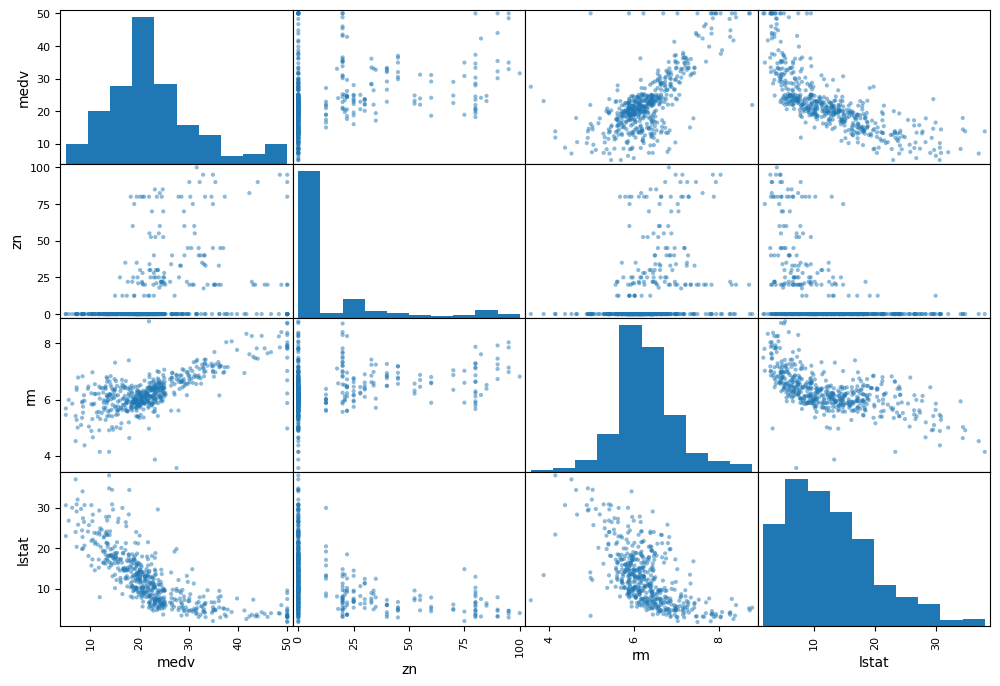

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ['medv' , 'zn' , 'rm' , 'lstat']
scatter_matrix(housing[attributes] , figsize = (12,8))

<Axes: xlabel='rm', ylabel='medv'>

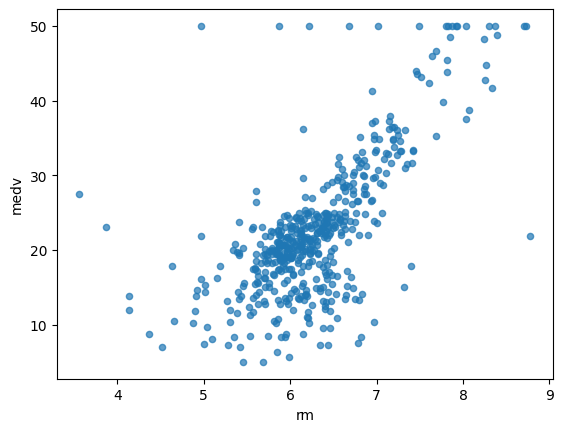

In [ ]:
housing.plot(kind = 'scatter' , x = 'rm' , y = 'medv', alpha = 0.7)

In [ ]:
housing['taxrm'] = housing['tax']/housing['rm']
housing.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,taxrm
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([('imputer' , SimpleImputer(strategy = 'median')), (('std_scaler') , StandardScaler())])

In [ ]:
imputer = SimpleImputer(strategy ='median')
X = imputer.fit_transform(housing)
housing_transform = pd.DataFrame(X, columns = housing.columns)

In [ ]:
housing_transform.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,254.963061,3.836916,11.486807,11.034274,0.068602,0.552453,6.299726,68.546174,3.840121,9.646438,410.498681,18.504485,359.241583,12.656464
std,146.473262,9.361823,23.379486,6.877665,0.253110,0.112063,0.680994,28.267600,2.158493,8.784098,169.320184,2.146969,88.441828,7.164560
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.389000,4.138000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.920000
25%,125.500000,0.082100,0.000000,5.130000,0.000000,0.451000,5.887500,44.050000,2.120350,4.000000,282.500000,17.400000,377.120000,6.865000
50%,252.000000,0.241030,0.000000,8.560000,0.000000,0.538000,6.223000,77.300000,3.199200,5.000000,330.000000,19.100000,392.180000,11.340000
75%,380.500000,3.805910,12.500000,18.100000,0.000000,0.624000,6.605000,94.200000,5.344000,24.000000,666.000000,20.200000,396.210000,17.025000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [ ]:
housing = strat_train_set.drop('medv', axis =1)
housing_labels = strat_train_set['medv'].copy()

In [ ]:
housing_num_transform = housing.to_numpy()

In [ ]:
housing_num_transform.shape

(379, 14)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
result = model.fit(housing , housing_labels)

In [ ]:
some_test_data = housing.iloc[:5]
some_exact_data = housing_labels.iloc[:5]
some_test_data = some_test_data.to_numpy()

In [ ]:
model.predict(some_test_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([17.6323506 , 29.96448423, 30.14786044, 26.87435973, 32.96152669])

In [ ]:
list(some_exact_data)

[23.1, 23.5, 32.7, 23.9, 37.2]

Evaluating The Model

In [ ]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_transform)
lin_mse = mean_squared_error(housing_labels , housing_predictions)
lin_rmse = np.sqrt(lin_mse)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
lin_mse

20.72588197943646

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model1 = DecisionTreeRegressor()
result1 = model1.fit(housing , housing_labels)

In [ ]:
housing_predictions1 = model1.predict(housing_num_transform)
lin_mse1 = mean_squared_error(housing_labels , housing_predictions1)
lin_rmse1 = np.sqrt(lin_mse1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


Testing The Data

In [ ]:
X_test = strat_test_set.drop('medv', axis = 1)
Y_test = strat_test_set['medv'].copy()
final_predictions = model1.predict(X_test)
final_mse = mean_squared_error(Y_test , final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse

3.96008629509092

In [ ]:
print(final_predictions)
print(list(Y_test))

[ 8.5 50.  17.1 24.7 33.1 17.5 31.1 22.8 21.  50.  18.3 20.4 14.  17.8
 22.6 36.1 34.6 43.8 32.  15.4 30.8 15.1 27.5 30.8 12.6 28.7 24.6 27.5
 13.4 23.  17.1 23.4 20.5 24.2 13.2 32.5 11.3 33.8 19.3 11.5 43.5  8.8
 31.1 14.5 17.5 21.9 16.2  9.5 43.5 13.4 22.9 23.7 21.2 43.5 36.2 16.1
 17.5 48.8 17.3 18.9 24.4 20.1 13.4 24.3 22.  12.  19.6 17.8 44.8 25.2
 21.7 11.7 15.2 13.4 11.7 37.2 31.5 26.6 16.8 13.4 32.4 15.6 36.2 16.6
 20.4 29.  10.4 20.1 14.1 19.1 20.4 20.5 50.  19.4 18.1 20.5 20.3 19.4
 21.7 21.6 18.9 19.5 21.7 24.3 27.1 22.  19.3  9.5 25.  35.4 19.9 27.1
 24.8 15.2 23.  21.2 25.2 17.1 15.  21.4 21.2 20.5 35.4  8.4 14.8 31.7
 10.2]
[12.1, 48.5, 15.6, 21.7, 41.3, 20.1, 24.5, 20.8, 30.1, 50.0, 21.8, 21.1, 14.4, 29.8, 23.9, 33.4, 30.3, 45.4, 28.2, 13.8, 27.9, 19.4, 14.1, 28.5, 17.0, 23.7, 22.6, 26.7, 14.3, 23.6, 18.4, 23.3, 24.3, 24.1, 13.6, 35.1, 9.7, 31.0, 19.9, 12.3, 50.0, 7.4, 24.8, 15.2, 20.9, 23.1, 14.3, 8.1, 43.1, 11.0, 21.6, 22.8, 20.0, 42.3, 33.4, 21.8, 13.9, 50.0, 15.7, 27